# YAHOO FINANCE (TIPO DE CAMBIO)

Usaremos la librería de Yahoo Finance para obtener series de alta frecuencia (diarias). Particularmente, nos interesa hacer seguimiento del tipo de cambio en múltiples economías del mundo.

In [1]:
# Importamos las librerías necesarias para el trabajo
import yahoo_finance as yahoo
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data
import seaborn as sns

In [7]:
# Definimos las fechas que vamos a trabajar
start = datetime.datetime(2022,11,1) #año mes dia
end = datetime.datetime(2022,12,5)
# Colocamos las monedas de interés (principales economías del mundo)
list_of_tickers = ['USDAUD=X','USDARS=X','USDBRL=X','USDCAD=X','USDCNY=X','USDCLP=X','USDCOP=X','USDHKD=X','USDHUF=X','USDIDR=X','USDINR=X','USDILS=X','USDJPY=X','USDKRW=X','USDMYR=X','USDMXN=X','USDPEN=X','USDPHP=X','USDPLN=X','USDCZK=X','USDRON=X','USDRUB=X','USDSAR=X','USDSGD=X','USDZAR=X','USDSEK=X','USDCHF=X','USDTWD=X','USDTHB=X','USDTRY=X','GBP=X','USDVND=X','USDEUR=X','DX-Y.NYB','HG=F','^GSPC','^VIX','^TNX']

In [8]:
# Incorporamos lo predefinido para crear un dataframe
currencies = data.DataReader(list_of_tickers, 'yahoo', start, end)['Adj Close'].reset_index()
# Extraemos fecha
currencies['Year'] = currencies['Date'].dt.year
currencies['Month'] = currencies['Date'].dt.month
currencies['Day'] = currencies['Date'].dt.day
# Reemplazamos otros valores atípicos
currencies=currencies.replace(r'^\s*$', np.nan, regex=True)
# Reemplazamos los missings por el anterior valor válido
currencies = currencies.fillna(method='bfill')
# Exportamos a excel
currencies.to_excel('TC mundial.xlsx', sheet_name='Monedas', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, inf_rep='inf', freeze_panes=None, storage_options=None)

##### Gráfico 01: Tipo de cambio y precio de cobre

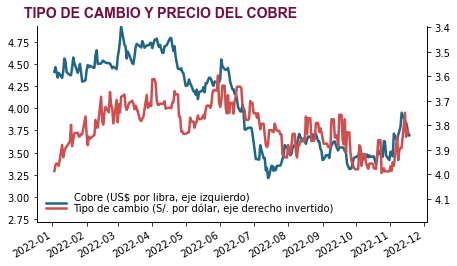

In [5]:
# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(7, 4))
ax2 = ax1.twinx()
# Fuente de letra
csfont = {'fontname':'Arial'}

# AX1=EJE IZQ (Cobre)
# AX2=EJE DER (Tipo de cambio)

# Graficar ambas series
ax1.plot(currencies['Date'], currencies['HG=F'], label='Cobre (US$ por libra, eje izquierdo)\n', color="#216686",lw=2.5 )
ax2.plot(currencies['Date'], currencies['USDPEN=X'], label='Tipo de cambio (S/. por dólar, eje derecho invertido)',color="#CD4F4F",lw=2.5)
#currencies.index

# Leyenda
ax1.legend(loc=3, frameon=False)
ax2.legend(loc=3, frameon=False)

# Eje x sin etiqueta nombre
ax1.set_xlabel("")

# Borrar el marco superior
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

# EJE IZQUIERDO
ax1.set_ylabel("", fontsize=11,**csfont)
ax1.tick_params(axis="y")
ax1.set_ylim(min(currencies['HG=F']-0.5), max(currencies['HG=F']))

# EJE DERECHO
ax2.set_ylabel("", fontsize=11, **csfont)
ax2.tick_params(axis="y")
ax2.set_ylim(max(currencies['USDPEN=X']+0.2), min(currencies['USDPEN=X'])-0.2)

# TÍTULO
fig.suptitle("TIPO DE CAMBIO Y PRECIO DEL COBRE" , color="#700E3E", fontsize=14, **csfont, horizontalalignment = 'left',
             x=0.1,
             y=0.95,
             transform=fig.transFigure, fontweight="bold")

# GRÁFICO
fig.autofmt_xdate()

##### Gráfico 02: Diagrama de dispersión (REGRESIÓN POLINOMIAL)

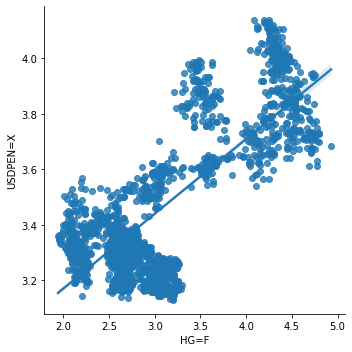

In [54]:
sns.lmplot(data = currencies,
            x = "HG=F",
            y = "USDPEN=X",
            order = 1)